In [1]:
import cv2
import os
import numpy as np
from skimage.io import imsave, imread
import keras
from pseudoRGB import *
from resizeToFit import *
from getOneMask import *
from upscaler import *


Using TensorFlow backend.


In [2]:
def preprocessing (x, y = None, resizeTo = None):
        # resize to intermediate size
        imageSize = (256, 256)
        maskSize = (256, 256)
        if resizeTo is None:
            resizeTo = imageSize
        x = resizeToFit (x, resizeTo)
        x = pseudoRGB (x, "clahe")
        
        if y is not None:
            if resizeTo is None:
                resizeTo = maskSize
            y = resizeToFit (y, resizeTo)
            y = y.astype('float32')/255
            return x, y
        return x




In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [30]:
mask =imread('1377_pred.png', as_grey=True)
image = imread('1377.png', as_grey = True)
ttt = pseudoRGB(image)

#get the original image, preprocess it
originalImage = image.copy()
originalImageShape = originalImage.shape
originalImage = preprocessing(image, resizeTo = originalImageShape)
#originalImage = resizeToFit(image, originalImageShape)

#tmpimgs = np.ndarray((1, 224, 224, 3), dtype=np.uint8)
#image = preprocessing(image)
#tmpimgs[0, :, :, :] = image

#upscale the mask
predicted_mask = upscaler(mask, originalImageShape)
predicted_mask = predicted_mask/np.max(predicted_mask)
#predicted_mask = predicted_mask*255
#predicted_mask = getOneMask(predicted_mask)
predicted_mask = np.squeeze(predicted_mask)

for c in range(originalImage.shape[2]):
    originalImage [:, :, c] = originalImage [:, :, c] * predicted_mask
imsave("3268_new3.png", np.squeeze(originalImage))



Image has shape:(2044, 1514),1
More rows than cols.
Factor: 0.12524461839530332
Small shape:(256, 189)
Pad: 33
(256, 190, 1)
(1514, 2044)


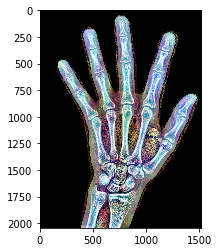

In [31]:
plt.imshow(np.squeeze(originalImage), cmap='gray')

In [61]:
def clahe_augment(img):
    clahe_low = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
    clahe_medium = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_high = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
    img_low = clahe_low.apply(img)
    img_medium = clahe_medium.apply(img)
    img_high = clahe_high.apply(img)
    augmented_img = np.array([img_low, img_medium, img_high])
    augmented_img = np.swapaxes(augmented_img,0,1)
    augmented_img = np.swapaxes(augmented_img,1,2)
    return augmented_img

In [62]:
def preprocessingadd(img, size=(512, 512)):
    img = np.expand_dims(img[:, :, 0], axis=-1)
    print(img.shape)
    img = resizeToFit(img, size)
    print(img.shape)
    img_clahe = clahe_augment(img)
    print(img_clahe.shape)
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    print(img_blur.shape)
    img_unsharp_masking = cv2.addWeighted(img, 1.5, img_blur, -0.5, 0, None)
    print(img_unsharp_masking.shape)
    return np.stack([img, img_clahe, img_unsharp_masking], axis=2)

(2044, 1514)


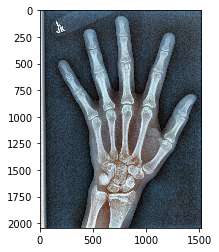

In [64]:
tt = cv2.imread('1377.png', -1)
print(tt.shape)
#preprocessingadd(tt)
a=clahe_augment(tt)
plt.imshow(a)



In [229]:
# first method: preprocess image
def preprocessing (x, y = None, resizeTo = (224,224)):
            # resize to intermediate size
            x = resizeToFit (x, resizeTo)
            
            x = pseudoRGB (x, "clahe")/255
            if y is not None:
                y = resizeToFit (y, resizeTo)
                y = y.astype('float32')/255
                return x, y
            return x

In [252]:
 def postprocessing (  x, y = None, method = "crop", visualize = False):
        imageShape = (224, 224, 3)
        if method == "resize":
            x = resizeToFit (x, imageShape)
            if y is not None:
                y = resizeToFit (y, imageShape)
                y = y.astype('float32')/255
                return x, y
            return x
        
        if method == "crop":
            # assume quadratic images
            #print (x.shape)
            offsetRow = (x.shape[0] - imageShape[0])//2
            offsetCol = (x.shape[1] - imageShape[1])//2
            #print (offsetRow )
            #print (offsetCol )
            x = x[offsetRow:offsetRow+imageShape[0], offsetCol:offsetCol + imageShape[1], :].copy()
            #print (x.shape)
            # do simple cropping 

            if visualize == True:
                fig2 = plt.figure(figsize = (10,5)) # create a 5 x 5 figure 
                for i in range(0, 9):
                    pyplot.subplot(1, 2,  1)
                    pyplot.imshow(x)
                    #pyplot.subplot(1, 2, 2)
                    #pyplot.imshow(y)
                    # show the plot
                pyplot.show()
                
            
            if y is not None:
                y = resizeToFit (y, imageShape)
                y = y.astype('float32')/255
                return x, y
            return x

In [261]:
img = cv2.imread("/Users/Ming/Dropbox/unet/1377_new.png", 0)
print(img.shape)
method1 = preprocessing(img)
print(method1.shape)
imsave("/Users/Ming/Dropbox/unet/1377_method1.png", method1)

(2044, 1514)
hihihih
2
(224, 224, 3)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


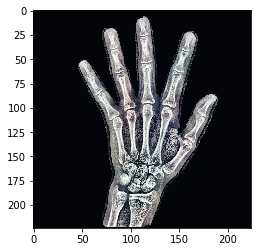

In [262]:
plt.imshow(method1)

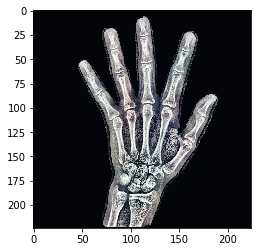

In [233]:
plt.imshow(method1)

In [253]:
img = cv2.imread("/Users/Ming/Dropbox/unet/1377_new.png", -1)
print(img.shape)
method2 = cv2.resize(img, (512, 512))
method2 = postprocessing(method2)
imsave("/Users/Ming/Dropbox/unet/1377_method2.png", method2)

(2044, 1514, 3)


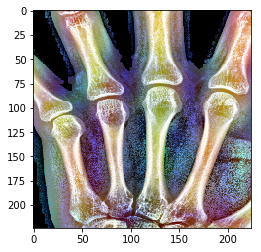

In [254]:
plt.imshow(method2)

In [211]:
img = cv2.imread("/Users/Ming/Dropbox/unet/1377_new.png", -1)
print(img.shape)
method3 = resizeToFit(img, (512, 512, 3))
method3 = postprocessing(method3)
imsave("/Users/Ming/Dropbox/unet/1377_method3.png", method3)

(2044, 1514, 3)
hihihih
3


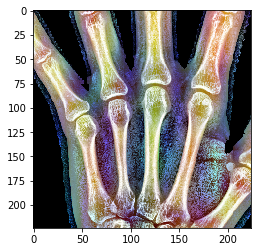

In [212]:
plt.imshow(method3)

In [218]:
img = cv2.imread("/Users/Ming/Dropbox/unet/1377_new.png", -1)
print(img.shape)
method4 = resizeToFit(img, (224, 224, 3))
method4 = method4.astype('float32')/255
imsave("/Users/Ming/Dropbox/unet/1377_method4.png", method4)

(2044, 1514, 3)
hihihih
3


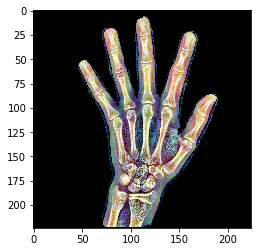

In [219]:
plt.imshow(method4)